# The Restaurant Industry in the U.S. Amidst the COVID-19 Pandemic
We use data from OpenTable and the New York Times to answer the following business questions: How has the state of the restaurant industry changed over time and when did it become severely affected by the pandemic? Is there a relationship between the behavior of the curve of new COVID-19 cases and the state of the restaurant industry? How has the recovery of the industry varied across states that have implemented different reopening policies?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

In [3]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()
months_fmt = mdates.DateFormatter('%b')
days_fmt = mdates.DateFormatter('%b-%d')

In [4]:
df = pd.read_csv('YoY_Reopened_Seated_Diner_Data.csv')
df2 = pd.read_csv('YoY_Seated_Diner_Data.csv')

# Data Cleansing
In this section, we will clean the data by removing missing values, formatting the columns and converting the data into the appropriate data types

### Reopened seated diners data
Daily year-over-year comparison of the number of seated diners. The data reflect the number of seated diners on a given day in 2020 as a percentage of the number of seated diners on the same day last year (e.g. 100% on March 1st would mean there was the same number of diners on this date in 2020 than on the same date in 2019). This data set includes data from restaurants that have chosen to reopen only. 

In [5]:
# format columns - create two columns with date and value
df=df.melt(id_vars=["Type", "Name"], 
        var_name="Date", 
        value_name="Value")

In [6]:
# fill null values with 0
# since this includes data from restaurants that have chosen to reopen only, we fill with 0 because missing values 
# means there were no seated diners
df['Value'] = df['Value'].fillna(0)

In [7]:
#Change date format
to_date = lambda row: row+"/2020"
df['NewDate'] = df['Date'].map(to_date)
df['NewDate'] = pd.to_datetime(df['NewDate'])
df = df[['Type','Name','Value','NewDate']]

### Seated diners data
This data set is a daily year-over-year comparison of the number of seated diners including all restaurants that meet the criteria established by OpenTable, without taking into account if they have reopened or not.

In [8]:
# format columns 
df2=df2.melt(id_vars=["Type", "Name"], 
        var_name="Date", 
        value_name="Value")

In [9]:
# drop missing values
df2=df2.dropna()

In [10]:
#Change date format
to_date = lambda row: row+"/2020"
df2['NewDate'] = df2['Date'].map(to_date)
df2['NewDate'] = pd.to_datetime(df2['NewDate'])
df2 = df2[['Type','Name','Value','NewDate']]

In [11]:
df_dates = df2.NewDate.unique()

# Data Visualization and Analysis
This section will focus on data exploration. We will use plots made with matplotlib to better understand the data, identify patterns and trends, and draw insights to answer the questions we posed at the beginning of the project

In [12]:
df

,Type,Name,Value,NewDate
0,country,Global,0.00,2020-04-01
1,country,Canada,0.00,2020-04-01
2,country,Germany,0.00,2020-04-01
3,country,Mexico,9.87,2020-04-01
4,country,United Kingdom,0.00,2020-04-01
...,...,...,...,...
1882,state,Ontario,70.05,2020-07-20
1883,state,Pennsylvania,55.22,2020-07-20
1884,state,Texas,47.38,2020-07-20
1885,city,London,48.03,2020-07-20


In [13]:
df2

,Type,Name,Value,NewDate
0,country,Global,-1.00,2020-02-18
1,country,Australia,-3.00,2020-02-18
2,country,Canada,-5.00,2020-02-18
3,country,Germany,11.00,2020-02-18
4,country,Ireland,2.00,2020-02-18
...,...,...,...,...
16165,city,Seattle,-88.06,2020-07-20
16166,city,Tampa,-41.42,2020-07-20
16167,city,Toronto,-70.72,2020-07-20
16168,city,Vancouver,-60.26,2020-07-20


## Seated diners in the US over time
The line plot below illustrates the number of seated diners in the US in 2020 from February until July as a percentage of the number of diners on the same day in 2019.

In [14]:
us_diners = df2[(df2['Type']=='country') & (df2['Name']=='United States')]

In [15]:
us_diners.shape

(154, 4)

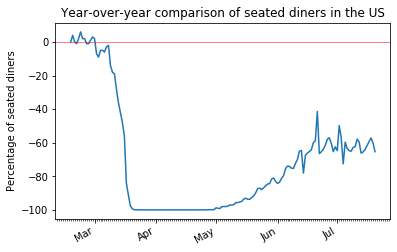

In [16]:
fig, ax = plt.subplots()
ax = plt.axes()
ax.plot(us_diners['NewDate'],us_diners['Value'])

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

ax.axhline(y=0,linewidth=0.5, color='r')

fig.autofmt_xdate()

plt.ylabel('Percentage of seated diners')
plt.title('Year-over-year comparison of seated diners in the US')
plt.show()

Since the outbreak of the pandemic in the US in early March, the number of seated diners has been significantly lower than in 2019, remaining in -100%, meaning there were no seated diners, between mid-March and May. The steepest decline was in March, which marked the outbreak of the pandemic in the US. On the other hand, a slow but steady recovery started at the beginning of May and lasted until late-June when the number of seated diners started to fluctuate and slightly fall again. 

### Seated diners in the US between mid-February and April
The following graph zooms into the days before the outbreak of the pandemic and renders a more detailed view of the decline in seated diners in March.

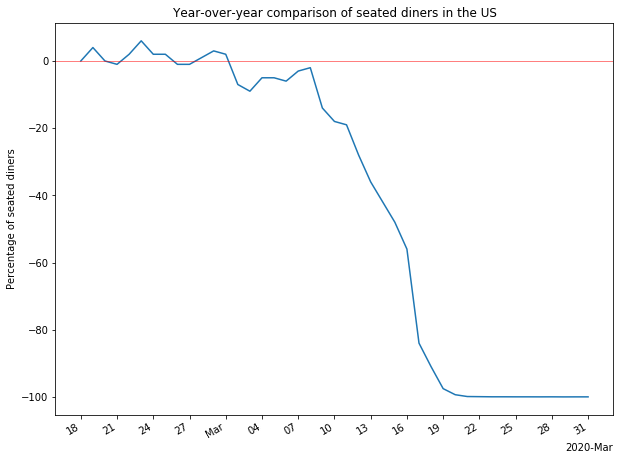

In [17]:
april = '2020-04-01'
april = pd.to_datetime(april)
before = us_diners[us_diners['NewDate']<april]
plt.close('all')
fig2, ax2 = plt.subplots(figsize=(10,8))
ax2 = plt.axes()
ax2.plot(before['NewDate'],before['Value'])

# format the ticks
locator = mdates.DayLocator(interval = 3)
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

ax2.axhline(y=0,linewidth=0.5, color='r')

fig2.autofmt_xdate()

plt.ylabel('Percentage of seated diners')
plt.title('Year-over-year comparison of seated diners in the US')
plt.show()

It is clear from the plot that until the beginning of March the number of seated diners was the same or larger by a few percentage points than last year. However, on the first days of March, the percentage of seated diners fell below the zero line. It was around May 8 when the number of seated diners plummeted and in around 14 days went from the zero line to -100%, meaning there were no seated diners. 

## Seated diners per state
We use a heatmap to illustrate the change in the number of seated diners per state over time

In [18]:
state_data = df2[df2['Type']=='state']

In [19]:
us_states = ['Alabama', 'Arizona', 'California', 'Colorado', 'Connecticut',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Missouri', 'Nebraska', 'Nevada', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania','Rhode Island', 'South Carolina', 'Tennessee', 
       'Texas', 'Utah', 'Virginia', 'Washington', 'Wisconsin']
state_data = state_data[state_data['Name'].isin(us_states)]
state_data['Date'] = state_data["NewDate"].dt.strftime("%m-%d")

In [20]:
df_states = state_data.Name.unique()

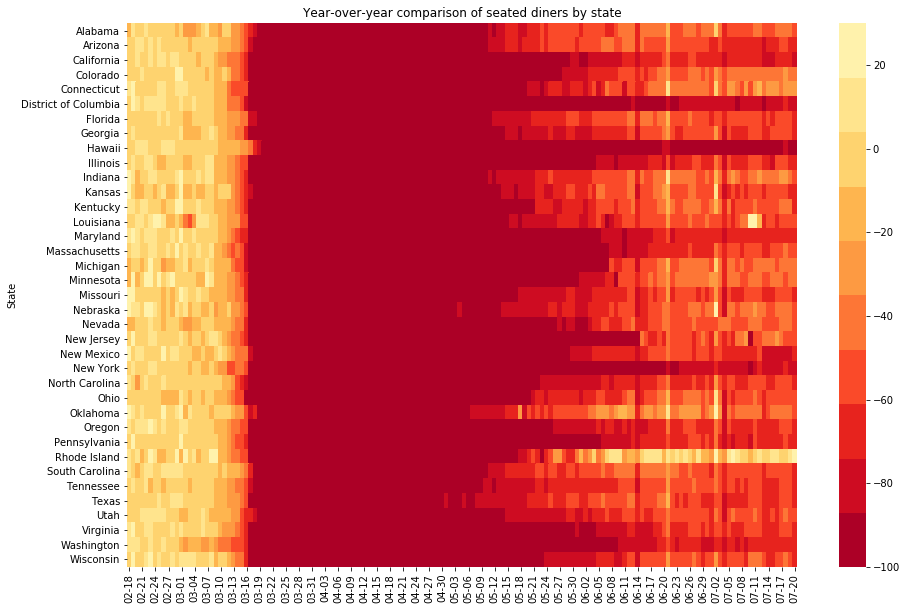

In [21]:
plt.close('all')
fig3, ax3 = plt.subplots(figsize=(15,10))
ax3 = plt.axes()
states_hm = state_data.pivot("Name","Date","Value")
col = sns.color_palette("YlOrRd_r", 10)
ax3 = sns.heatmap(states_hm,vmin=-100,vmax=30,cmap=col)
plt.ylabel("State")
plt.title("Year-over-year comparison of seated diners by state")
plt.xlabel("")
plt.show()

The heatmap above depicts the number of seated diners by state from February until July 2020. We can see a clear drop in seated diners across all states throughout mid-March and the beginning of May when some states started reopening and the number of seated diners started to gradually grow. Some of the first states to see an increase in the number of seated diners were Texas, Oklahoma, Arizona, Florida, and Georgia--Texas being the state with the earliest resurgence in seated diners. On the other hand, the states with the latest resurgence in seated diners were California, District of Columbia, Hawaii, Maryland, Massachusetts, New Jersey, New York, Pennsylvania, Virginia, and Washington.

## Recovery rate
In this section, we will work with the "Reopened seated diners" data set, which includes data on restaurants that have chosen to reopen. We will examine week-over-week percentage differences to get an idea of the recovery rate of the industry. Because this data set includes data from restaurants that have chosen to reopen only, there are null values for most states throughout March and May when most restaurants were closed.

In [22]:
us_df = df[(df['Type']=='country') & (df['Name']=='United States')]
us_states = ['Alabama', 'Arizona', 'California', 'Colorado', 'Connecticut',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana',
       'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Missouri', 'Nebraska', 'Nevada', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania','Rhode Island', 'South Carolina', 'Tennessee', 
       'Texas', 'Utah', 'Virginia', 'Washington', 'Wisconsin']
states_df = df[df['Name'].isin(us_states)]

## Global recovery
To begin with, we plot the number of seated diners at reopened restaurants in the US to get a grasp of the global state of the industry in the country.

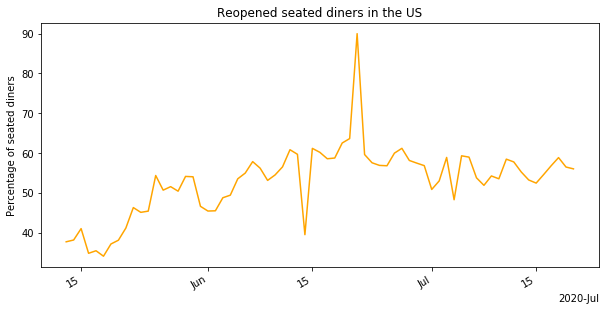

In [23]:
plt.close('all')

fig4, ax4 = plt.subplots(figsize=(10,5))

ax4 = plt.axes()
no_null = us_df[us_df['Value']!=0.00]
ax4.plot(no_null['NewDate'],no_null['Value'],color='orange')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(formatter)

fig4.autofmt_xdate()

plt.ylabel('Percentage of seated diners')
plt.title('Reopened seated diners in the US')
plt.show()


This graph provides a global view of the recovery of the restaurant industry in the US. The data starts in mid-May because there is no available data before that, indicating restaurants across the country started to reopen around this time. We can see a slow recovery from mid-May until late June, a peak around this time, followed by what seems a downward trend in the number of seated diners and what appears to be a halt in the recovery. 

In [30]:
# we drop rows with 0 values because these values don't give us any insights other than indicate the time at which 
# restaurants started to reopen
states_df = states_df[states_df.Value!=0]
states = states_df['Name'].unique()

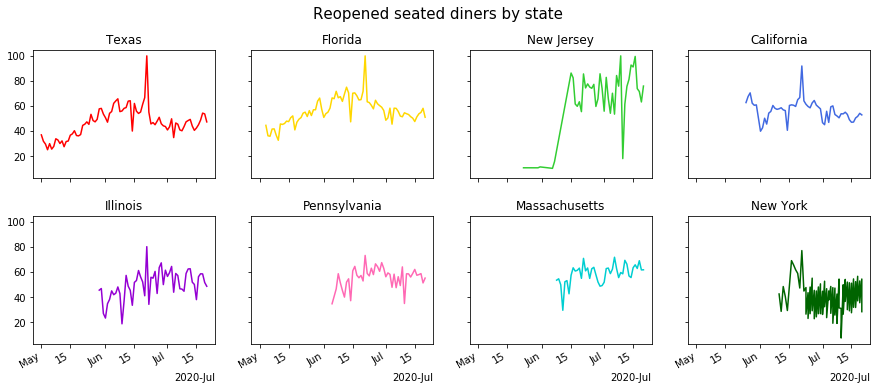

In [31]:
plt.close('all')
states = states_df['Name'].unique()
fig9, ax9 = plt.subplots(2,4,figsize=(15,6),sharex=True,sharey=True)

colors = ['red','gold','limegreen','royalblue','darkviolet','hotpink','darkturquoise','darkgreen']
j=0
i=0
c=0
for s in states:
    temp = states_df[states_df.Name==s]
    ax9[j,i].plot(temp['NewDate'],temp['Value'],color=colors[c])
    ax9[j,i].set_title(str(s))
    if (i==3):
        i=0
        j=1
    else:
        i=i+1
    c=c+1

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax9[0,0].xaxis.set_major_locator(locator)
ax9[0,0].xaxis.set_major_formatter(formatter)

fig9.autofmt_xdate()
fig9.suptitle('Reopened seated diners by state',fontsize=15)
plt.subplots_adjust(hspace=0.3)
plt.show()

The grid above illustrates that the states of Texas and Floridas were the first ones to have restaurants reopen. Since the reopening, both states have had an occupation above 20%, which spiked in mid-June and fell again in July. New Jersey has kept a higher occupation since its reopening, fluctuating between 60-100%. California's occupation has fluctuated between 40-60%, with a spike in early-June. Illinois, Pennsylvania, and Massachusetts have had similar trends, fluctuating around 60%. Lastly, it can be inferred that New York had a late reopening compared to other states and has kept a lower occupation between 20-60% in June and July. 

## Week-over-week percentage change
In this section we will compute week-over-week percentage changes in the number of reopened seated diners to get a grasp of the recovery rate across different states in the US. 

In [32]:
# group data by week
states_df['Date'] = states_df['NewDate'] - pd.to_timedelta(7, unit='d')

In [33]:
# compute week-over-week percentage change by state
states_df2 = states_df.groupby(['Name', pd.Grouper(key='Date', freq='W-MON')])['Value'].mean().reset_index().sort_values('Date')
states_df2['pct_change'] = states_df2.groupby(['Name'])['Value'].pct_change()
states_df2=states_df2.sort_values(['Name','Date'])

In [34]:
no_outliers = states_df2[states_df2['pct_change']<5]
avg = pd.DataFrame(states_df2.groupby('Date')['pct_change'].mean())
avg_no_outliers = pd.DataFrame(no_outliers.groupby('Date')['pct_change'].mean())
avg=avg.dropna()
avg_no_outliers = avg_no_outliers.dropna()

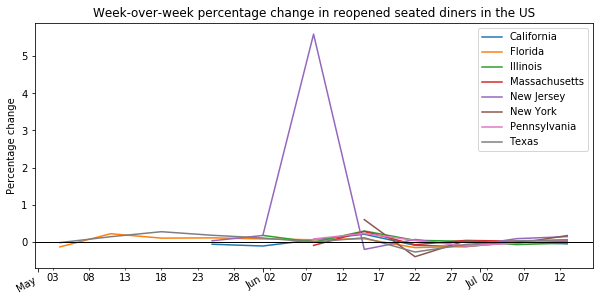

In [35]:
plt.close('all')

fig5, ax5 = plt.subplots(figsize=(10,5))
states = states_df2.Name.unique()

ax5 = plt.axes()

for s in states:
    st = states_df2[states_df2['Name']==s]
    ax5.plot(st['Date'],st['pct_change'],label=s)

locator = mdates.DayLocator(interval = 5)
formatter = mdates.DateFormatter('%d')

ax5.xaxis.set_major_locator(months)
ax5.xaxis.set_major_formatter(months_fmt)
ax5.xaxis.set_minor_locator(locator)
ax5.xaxis.set_minor_formatter(formatter)

fig5.autofmt_xdate()
ax5.axhline(y=0,linewidth=1, color='k')

plt.legend()
plt.ylabel('Percentage change')
plt.title('Week-over-week percentage change in reopened seated diners in the US')
plt.show()

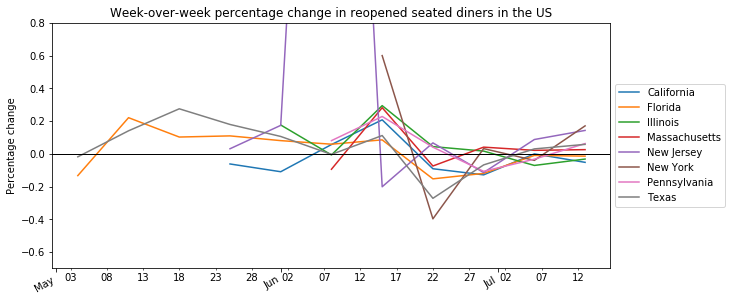

In [36]:
plt.close('all')

fig6, ax6 = plt.subplots(figsize=(10,5))
states = states_df2.Name.unique()

ax6 = plt.axes()

for s in states:
    st = states_df2[states_df2['Name']==s]
    ax6.plot(st['Date'],st['pct_change'],label=s)

locator = mdates.DayLocator(interval = 5)
formatter = mdates.DateFormatter('%d')

ax6.xaxis.set_major_locator(months)
ax6.xaxis.set_major_formatter(months_fmt)
ax6.xaxis.set_minor_locator(locator)
ax6.xaxis.set_minor_formatter(formatter)

fig6.autofmt_xdate()
ax6.axhline(y=0,linewidth=1, color='k')

plt.ylim(top=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Percentage change')
plt.title('Week-over-week percentage change in reopened seated diners in the US')
plt.show()

The line plot shows the week-over-week percentage change in reopened seated diners in the US by state. We include data of 8 states: California, Florida, Illinois, Massachusetts, New Jersey, New York, Pennsylvania, and Texas. Most data is cluttered in the last two months since most states reopened around this time. There has been a very slow, almost flat recovery across all states. For most of the few states that reopened since early May, the week-over-week percentage change in seated diners was above 0, indicating an increase in the number of seated diners over time, until around mid to late-June when most states' week-over-week percentage change converges to 0. In the first graph we can see there is an outlier for New Jersey, where the percentage change tops 5%; we chose to ignore this value since it does not tell us much about the New Jersey's recovery rate given that the curve goes back to zero right after the peak. 

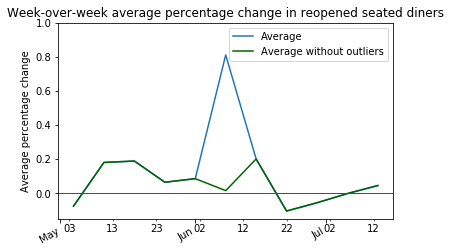

In [37]:
plt.close('all')

fig6, ax6 = plt.subplots()
states = states_df2.Name.unique()

ax6 = plt.axes()

ax6.plot(avg['pct_change'],label='Average')
ax6.plot(avg_no_outliers['pct_change'],label='Average without outliers',color='darkgreen')

locator = mdates.DayLocator(interval = 10)
formatter = mdates.DateFormatter('%d')

ax6.xaxis.set_major_locator(months)
ax6.xaxis.set_major_formatter(months_fmt)
ax6.xaxis.set_minor_locator(locator)
ax6.xaxis.set_minor_formatter(formatter)


fig6.autofmt_xdate()
ax6.axhline(y=0,linewidth=1, color='r')

plt.legend()
plt.ylim(top=1)
plt.ylabel('Average percentage change')
plt.title('Week-over-week average percentage change in reopened seated diners')
plt.show()

In the graph above we plot the average percentage change over time. There are two lines, one is the average including all the available data, and the second one is the average excluding the outlier we identified for New Jersey, which skews the data. Examining the green line, we can see that until around June 20th there was a positive average percentage change. After this date, the average percentage change turned negative and has been slowly increasing back up again since around June 22nd.

# The New York Times COVID-19 dataset
## Preparing the data
We will use a New York Times data set with the cumulative daily number of cases by state in the US. To begin with, we will prepare the data by formatting the date column, selecting a limited number of states, and mapping the dates to the OpenTable data set. Then, we will compute a new column with the daily number of new cases, which will be used in the plots. 

In [40]:
state_data

,Type,Name,Value,NewDate,Date
8,state,Alabama,-14.00,2020-02-18,02-18
10,state,Arizona,0.00,2020-02-18,02-18
13,state,California,-2.00,2020-02-18,02-18
14,state,Colorado,1.00,2020-02-18,02-18
15,state,Connecticut,8.00,2020-02-18,02-18
...,...,...,...,...,...
16116,state,Texas,-66.97,2020-07-20,07-20
16117,state,Utah,-55.58,2020-07-20,07-20
16119,state,Virginia,-65.33,2020-07-20,07-20
16120,state,Washington,-71.87,2020-07-20,07-20


In [41]:
covid_df = pd.read_csv("us-states.csv")
# convert date column to datetime format
covid_df['date']=pd.to_datetime(covid_df.date)
# list of states we will be working with
sts = ['California', 'Florida', 'Illinois', 'Massachusetts', 'New Jersey', 'New York', 'Pennsylvania', 'Texas']
covid_df=covid_df[covid_df.state.isin(sts)]

In [42]:
# compute daily new cases
covid_df['daily_cases'] = covid_df.groupby(['state'])['cases'].diff()

In [43]:
covid_df=covid_df[covid_df.date.isin(df_dates)]

## Daily number of new COVID-19 cases by state

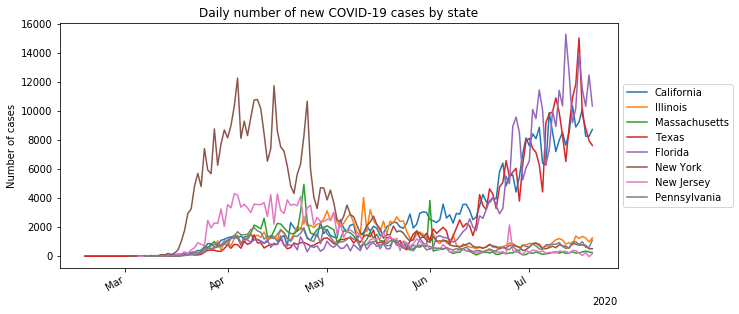

In [44]:
plt.close('all')

fig7, ax7 = plt.subplots(figsize=(10,5))
states = covid_df.state.unique()

ax7 = plt.axes()

for s in states:
    st = covid_df[covid_df['state']==s]
    ax7.plot(st['date'],st['daily_cases'],label=s)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax7.xaxis.set_major_locator(locator)
ax7.xaxis.set_major_formatter(formatter)

fig7.autofmt_xdate()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Number of cases')
plt.title('Daily number of new COVID-19 cases by state')
plt.show()

This plot provides a global view of the daily number of new COVID-19 cases by state in the US. Some important trends to highlight in this graph are the curve of New York state, which is higher than any other state at its peak but declines and flattens over time and the surge in cases in Texas, Florida, and California in the last month, overcoming New York's peak. We will compare the number of COVID-19 cases by state to the number of seated diners over time in each state. 

## Relationship between the number of seated diners and number of COVID-19 cases
We will compare the number of seated diners to the daily number of new COVID-19 cases in each of the states listed above to study if there is a relationship between these two variables and identify interesting trends across the states.

In [45]:
diners_df = state_data[state_data.Name.isin(sts)]
diners_df = diners_df.rename(columns={'Name':'state','NewDate':'date'})

In [46]:
# create a single dataframe with covid 19 cases and number of seated diners
df3 = diners_df.merge(covid_df,on=['date','state'],how='inner')
df3 = df3[['state','Value','date','cases','daily_cases']]

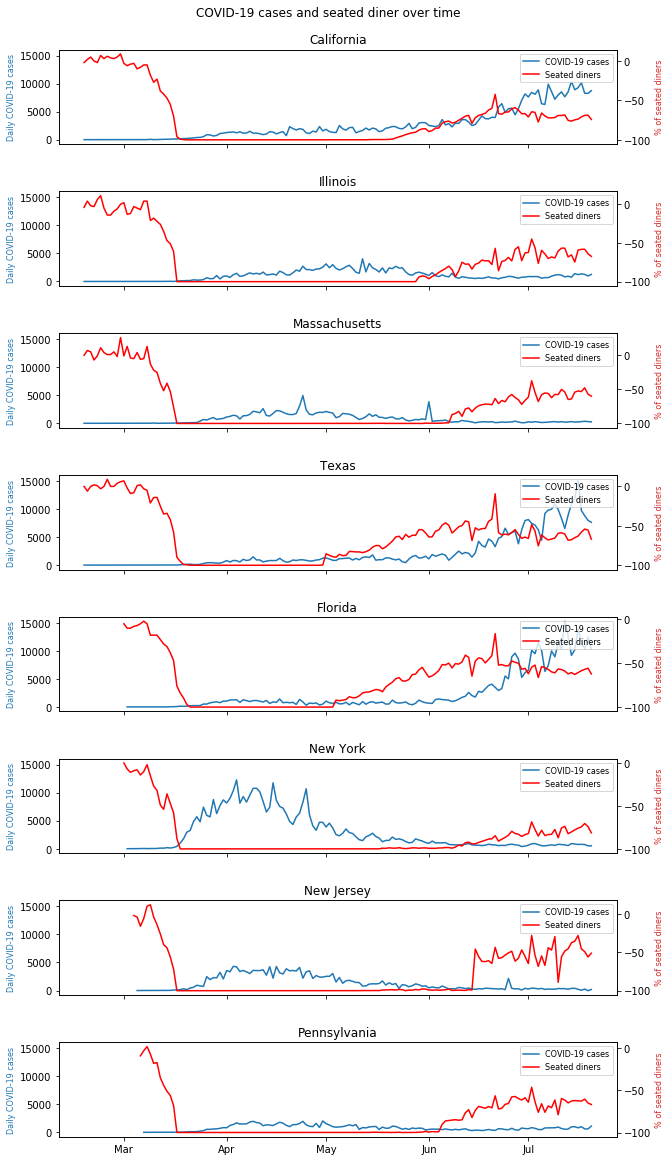

In [47]:
plt.close('all')
df3_states = df3.state.unique()
fig8, ax8 = plt.subplots(len(df3_states),1,figsize=(10,20),sharey=True,sharex=True)

for i,s in enumerate(df3_states):
    temp = df3[df3.state==s]
    f1=ax8[i].plot(temp['date'],temp['daily_cases'],label="COVID-19 cases")
    ax8[i].set_title(str(s))
    ax8[i].set_ylabel('Daily COVID-19 cases',fontsize=8,color='tab:blue')
    ax = ax8[i].twinx()
    f2=ax.plot(temp['date'],temp['Value'],color='r',label="Seated diners")
    ax.set_ylabel('% of seated diners',fontsize=8,color='tab:red')
    fs = f1+f2
    labs = [f.get_label() for f in fs]
    ax.legend(fs, labs,fontsize=8)

ax8[0].xaxis.set_major_locator(months)
ax8[0].xaxis.set_major_formatter(months_fmt)
fig8.suptitle('COVID-19 cases and seated diner over time',y=0.91, fontsize=12)
plt.subplots_adjust(hspace=0.5)
plt.show()

In the grid above we plot the number of COVID-19 cases and the number of seated diners by state over time. Some interesting trends are worth examining. Firstly, it is evident that the number of seated diners across all states fell to -100%--meaning there was a complete closure--around mid-March. This sudden fall in seated diners coincides with the surge in coronavirus cases across all states; as we can see, the blue and red lines intersect at the point where the percentage of seated diners fell to -100% and the number of COVID-19 cases started to rise. For this analysis, we will group the states above into three cases: the ones that had an early and dramatic peak of cases, the ones with a more moderate surge in cases and a steady curve, and the ones that have had a surge in cases in the last two months. To make the analysis and visualization more clear, we will draw the plots again by groups below. 

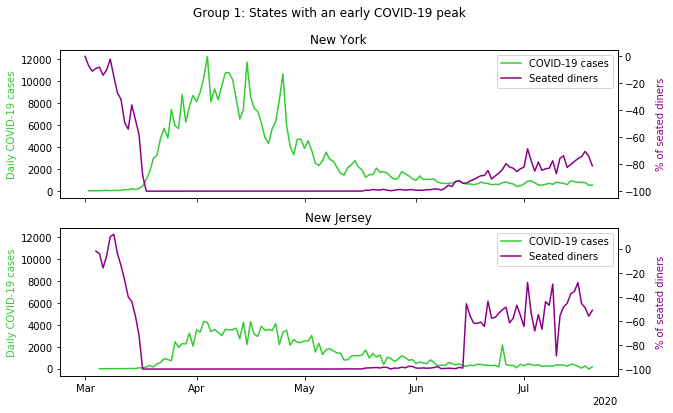

In [48]:
plt.close('all')
group1 = ['New York','New Jersey']
fig10, ax10 = plt.subplots(len(group1),1,figsize=(10,6),sharey=True,sharex=True)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

for i,s in enumerate(group1):
    ax = ax10[i].twinx()
    temp = df3[df3.state==s]
    f1=ax10[i].plot(temp['date'],temp['daily_cases'],label="COVID-19 cases",color='limegreen')
    f2=ax.plot(temp['date'],temp['Value'],color='darkmagenta',label="Seated diners")
    ax10[i].set_title(str(s))
    ax10[i].xaxis.set_major_locator(locator)
    ax10[i].xaxis.set_major_formatter(formatter)
    ax10[i].set_ylabel('Daily COVID-19 cases',color='limegreen')
    ax.set_ylabel('% of seated diners',color='darkmagenta')
    fs = f1+f2
    labs = [f.get_label() for f in fs]
    ax.legend(fs, labs)

fig10.suptitle('Group 1: States with an early COVID-19 peak', fontsize=12)
plt.show()

The first grid of plots illustrates New York and New Jersey were the states with the earliest and sharpest spikes in COVID-19 cases, and the ones with the latest resurgence in the number of seated diners. We can see the percentage of seated diners started to rise from zero by early to mid-June when the COVID-19 curve had flattened and was relatively stabilized. Compared to New Jersey and the rest of the states plotted in the first grid, the restaurant industry in New York has had a slower recovery, with the percentage of seated diners remaining below -60%.

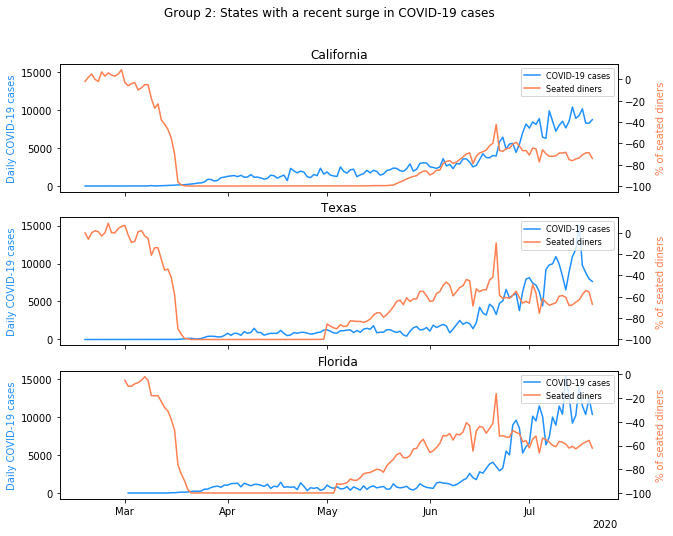

In [49]:
plt.close('all')
group2 = ['California','Texas','Florida']
fig11, ax11 = plt.subplots(len(group2),1,figsize=(10,8),sharey=True,sharex=True)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

for i,s in enumerate(group2):
    ax = ax11[i].twinx()
    temp = df3[df3.state==s]
    f1=ax11[i].plot(temp['date'],temp['daily_cases'],label="COVID-19 cases",color='dodgerblue')
    f2=ax.plot(temp['date'],temp['Value'],color='coral',label="Seated diners")
    ax11[i].set_title(str(s))
    ax11[i].xaxis.set_major_locator(locator)
    ax11[i].xaxis.set_major_formatter(formatter)
    ax11[i].set_ylabel('Daily COVID-19 cases',color='dodgerblue')
    ax.set_ylabel('% of seated diners',color='coral')
    fs = f1+f2
    labs = [f.get_label() for f in fs]
    ax.legend(fs, labs,fontsize=8)

fig11.suptitle('Group 2: States with a recent surge in COVID-19 cases', fontsize=12)
plt.show()

The graph depicts the virus has had similar behavior in Texas, Florida, and California. We can see that the number of daily COVID-19 cases in these states remained fairly stable, with an almost flat curve until around the beginning of June when the curves started rapidly inclining. From previous visualizations, we found Texas and Florida were some of the states with the earliest reopenings, and from the plots above we can see these two states have had the highest and fastest growth in the number of seated diners, with the percentage of seated diners reaching around -10% at its peak, getting close to pre-pandemic numbers. However, in the case of these three states, it is evident that there has been a slow down in the growth of the number of seated diners since late-June, which coincides with the surge in COVID-19 cases. 

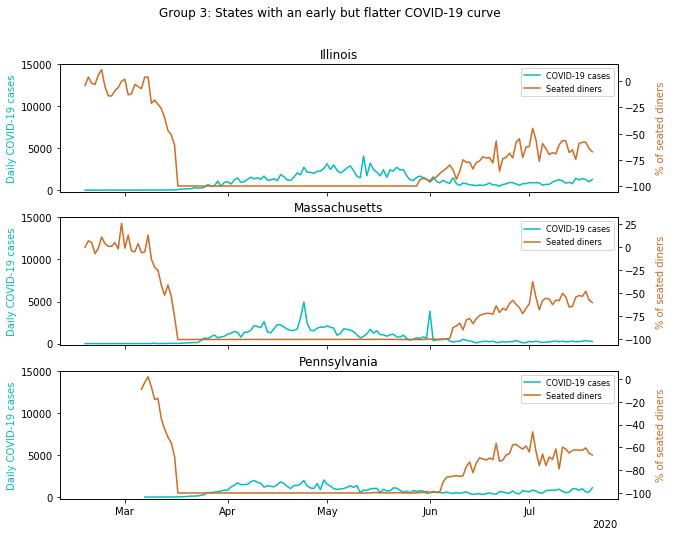

In [52]:
plt.close('all')
group3 = ['Illinois','Massachusetts','Pennsylvania']
fig12, ax12 = plt.subplots(len(group3),1,figsize=(10,8),sharey=True,sharex=True)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

for i,s in enumerate(group3):
    ax = ax12[i].twinx()
    temp = df3[df3.state==s]
    f1=ax12[i].plot(temp['date'],temp['daily_cases'],label="COVID-19 cases",color='c')
    f2=ax.plot(temp['date'],temp['Value'],color='chocolate',label="Seated diners")
    ax12[i].set_title(str(s))
    ax12[i].xaxis.set_major_locator(locator)
    ax12[i].xaxis.set_major_formatter(formatter)
    ax12[i].set_ylabel('Daily COVID-19 cases',color='c')
    ax.set_ylabel('% of seated diners',color='chocolate')
    ax12[i].set_ylim(top=15000)
    fs = f1+f2
    labs = [f.get_label() for f in fs]
    ax.legend(fs, labs,fontsize=8)

fig12.suptitle('Group 3: States with an early but flatter COVID-19 curve', fontsize=12)
plt.show()

It seems like these three are past the peak of COVID-19 cases and the curves have started to gradually flatten. Although much less severe than New York, the number of COVID-19 cases surged in mid-march when all restaurants closed. It seems like these states had a later reopening than Florida and Texas and that the curve of seated diners started to rise after the peak of COVID-19 cases had passed. The seated diners curve of the three states has grown up to -60% to -50%.

### Summing up
To sum up, we found interesting trends and patterns that suggest the curve of the number of seated diners has behaved similarly in states that have had similar curves of new COVID-19 cases. However, it is important to note that in no way can we conclude there is a causal relationship between the recovery of the restaurant industry and the number of new COVID-19 cases. Looking at the few states we studied, the states with the earliest reopenings and the highest rise in the number of seated diners since the recovery started have experienced a surge in cases in the last two months, which seems to be slowing down the rate of the recovery of the restaurant industry. On the other hand, in the states with the earliest spikes in COVID-19 cases, the number of seated diners started increasing later down the road, once the curve of new cases had been fairly stabilized. In these states, there has been a slower recovery in the restaurant industry, but one that seems to have an upward trend. 

## Summary
We started by plotting a year-over-year comparison of seated diners in the US to get an idea of the global state of the industry. Later on, we plotted a heatmap to illustrate the number of seated diners over time by state. We found that the number of seated diners plummetted at around the same time across all states, and found that the timing of the reopening (when seated diners started to increase again) varies across states, as well as the rate of the recovery of the industry. From the first part of our study, we learned the states with the earliest resurgence in the number of seated diners were Texas, Oklahoma, Arizona, Florida, and Georgia, while California, District of Columbia, Hawaii, Maryland, Massachusetts, New Jersey, New York, Virginia, and Washington had a later reopening.

In the second section, we use the 'Reopened seated diners' data set to study the state of the recovery of the industry. The curve of reopened seated diners for the whole country has an upward trend between mid-May and late June. After June 15th there was a spike and shortly after the number of seated diners fell back to below 60%. Since the spike in June, the curve for the US has been fluctuating around 50% without a visible upward trend. The plots with the percentage of reopened seated diners by state overtime match the insights we got from the first data set. Among the states studied, it is evident that Texas and Florida reopened significantly earlier than most states. In addition, Texas, Florida, New Jersey, and California reached higher numbers of seated diners in reopened restaurants. On the other hand, to get an idea of the response of consumers and the recovery rate of the industry, we calculated the week-over-week percentage change in seated diners in restaurants that have chosen to reopen. We plotted this metric over time and learned that the number of seated diners has not significantly grown since the start of the reopenings, with most curves being close to zero and not surpassing 4%. 

In the last section, we used a data set on cumulative daily COVID-19 cases made available by the New York Times. We calculated daily new COVID-19 cases by state to compare this metric with the number of seated diners over time. We found some similarities in the behavior of both curves across more than one state, which is why we grouped the states to better analyze and compare them. To sum up, we found that the states that had the earliest reopening have had a surge in COVID-19 cases in the last two months, and thus a moderate decline in the curve of seated diners. In contrast, the states with the earliest spikes in the number of COVID-19 cases and with the latest reopenings seem to have an upward sloping curve of seated diners, although less steep and with lower numbers than the ones of the states in the first group. 

Finally, we were able to draw meaningful insights from the data. It is evident that the spikes in COVID-19 cases have strongly affected the restaurant industry. The industry is far from reaching pre-pandemic numbers again, but especially for states that have stabilized the curve of COVID-19 cases, the curve of the number of seated diners seems to have an upward trend. The OpenTable data set was taken from a sample size of approximately 20,000 restaurants from metros or states with more than 50 restaurants on the OpenTable network in 2019 and 2020. Although the sample size is not representative of the American restaurant industry as a whole, it gives us an accurate idea of the state of the industry, especially in the states and cities with the largest networks. 
